In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/My Drive/GRIP/Iris.csv')

In [ ]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
from sklearn.utils import shuffle
data = shuffle(data)

In [ ]:
data = data.reset_index(drop = True)

In [ ]:
data = data.drop(["Id"], axis = 1)

In [ ]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,6.2,2.2,4.5,1.5,Iris-versicolor
1,5.0,3.0,1.6,0.2,Iris-setosa
2,5.7,3.8,1.7,0.3,Iris-setosa
3,4.6,3.4,1.4,0.3,Iris-setosa
4,7.3,2.9,6.3,1.8,Iris-virginica
...,...,...,...,...,...
145,6.8,2.8,4.8,1.4,Iris-versicolor
146,6.0,2.2,5.0,1.5,Iris-virginica
147,4.8,3.0,1.4,0.1,Iris-setosa
148,5.0,3.4,1.6,0.4,Iris-setosa


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
features = data.columns.to_list()
features.pop()

'Species'

In [ ]:
features

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [ ]:
x = data.iloc[:, [0, 1, 2, 3]].values

In [ ]:
type(x)

numpy.ndarray

In [ ]:
y = data.iloc[:, [4]].values

In [ ]:
for i in range(0, len(y)):
  if(y[i] == 'Iris-versicolor'):
    y[i] = int(1)
  elif(y[i] == 'Iris-virginica'):
    y[i] = int(2)
  else:
    y[i] = int(3)

In [ ]:
y = np.array(y, dtype = int, ndmin = 1)

In [ ]:
x.shape

(150, 4)

In [ ]:
y.shape

(150, 1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth = 4)
model.fit(x, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

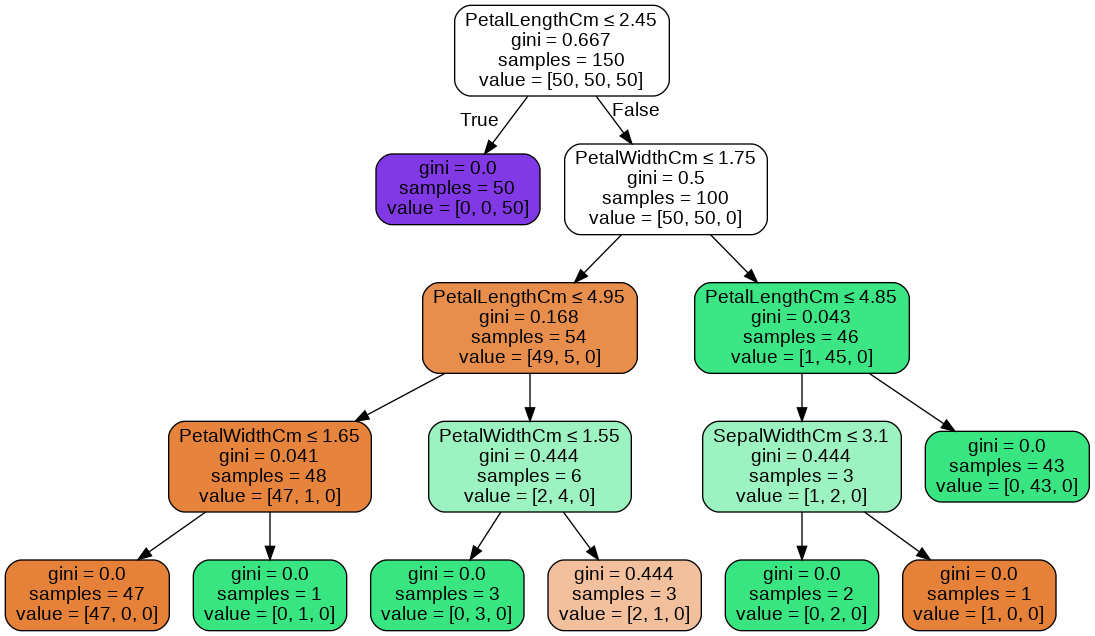

In [ ]:
# Import necessary libraries for graph viz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(model, out_file=dot_data, feature_names=features,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())